In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Загружаем данные в датафрейм (1)


In [3]:
hr_data = pd.read_csv('HR.csv')
hr_data.head() #Загружаем данные

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

### Считаем основные статистики для переменных (2)

In [4]:
hr_data.describe() #Средннее, СКО, квартили, max/min

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [5]:
hr_data.mode() #Мода

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.1             0.55             4.0                   135   
1                 NaN              NaN             NaN                   156   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                 3.0            0.0   0.0                    0.0      sales   
1                 NaN            NaN   NaN                    NaN        NaN   

  salary  
0    low  
1    NaN

### Считаем и визуализируем матрицу корреляций (3)

In [6]:
hr_data.drop(['Work_accident','left','promotion_last_5years','department','salary'], axis=1).corr() #Матрица корреляций

satisfaction_level  last_evaluation  number_project  \
satisfaction_level              1.000000         0.105021       -0.142970   
last_evaluation                 0.105021         1.000000        0.349333   
number_project                 -0.142970         0.349333        1.000000   
average_montly_hours           -0.020048         0.339742        0.417211   
time_spend_company             -0.100866         0.131591        0.196786   

                      average_montly_hours  time_spend_company  
satisfaction_level               -0.020048           -0.100866  
last_evaluation                   0.339742            0.131591  
number_project                    0.417211            0.196786  
average_montly_hours              1.000000            0.127755  
time_spend_company                0.127755            1.000000

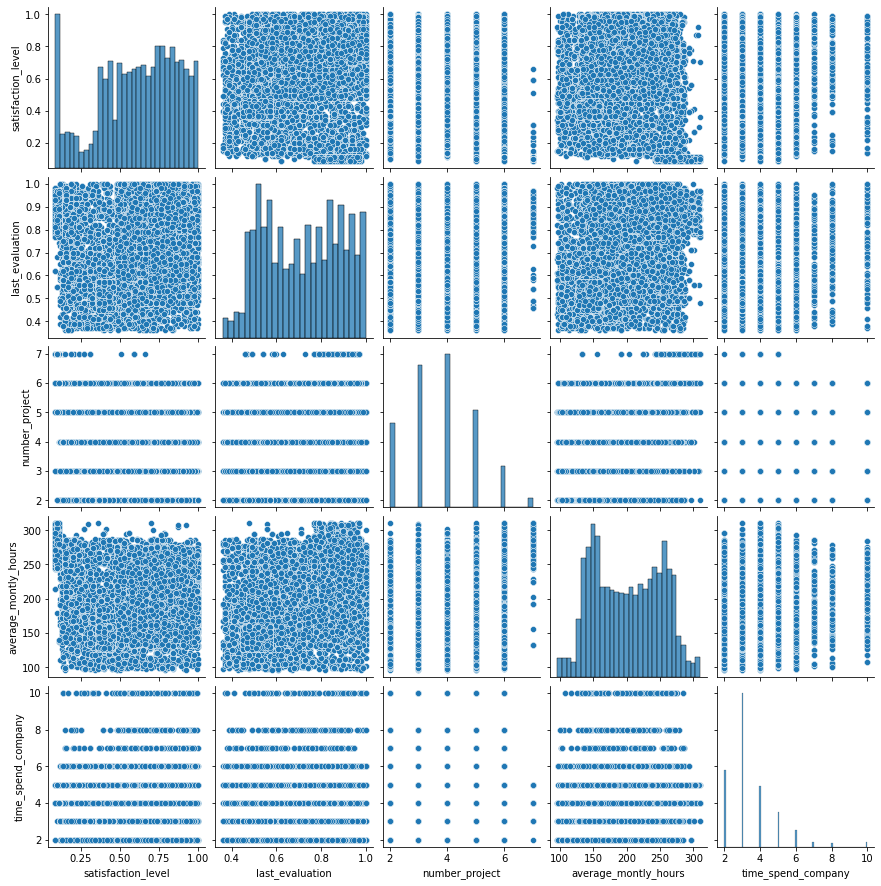

In [7]:
sns.pairplot(hr_data.drop(['Work_accident','left','promotion_last_5years','department','salary'], axis=1)) # Визуализация корреляции

##### Наиболее скоррелированные переменные - average_montly_hours и number_project

##### Наименее скоррелированные переменные - average_montly_hours и satisfaction_level

### Считаем сколько сотрудников работает в каждом департаменте (4)

In [8]:
hr_data.query('left == 0')['department'].value_counts() #Cчитаем сколько действующих сотрудников работает в каждом департаменте

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64

### Визуализируем распределение зарплат сотрудников (5)

(array([7316.,    0.,    0.,    0.,    0., 6446.,    0.,    0.,    0.,
        1237.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

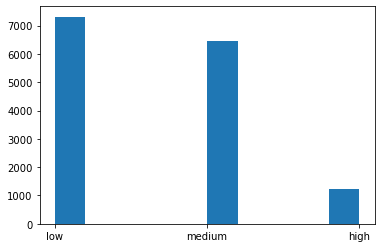

In [9]:
plt.hist(hr_data['salary']) #Распределение зарплат

### Визуализируем распределение зарплат сотрудников по департаментам (6)

In [10]:
def salary_sort (row):
    if row == 'low':
        return '0_low'
    elif row == 'medium':
        return '1_med'
    elif row == 'high':
        return '2_high'

array([[<AxesSubplot:title={'center':'IT'}>,
        <AxesSubplot:title={'center':'RandD'}>,
        <AxesSubplot:title={'center':'accounting'}>],
       [<AxesSubplot:title={'center':'hr'}>,
        <AxesSubplot:title={'center':'management'}>,
        <AxesSubplot:title={'center':'marketing'}>],
       [<AxesSubplot:title={'center':'product_mng'}>,
        <AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'support'}>],
       [<AxesSubplot:title={'center':'technical'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

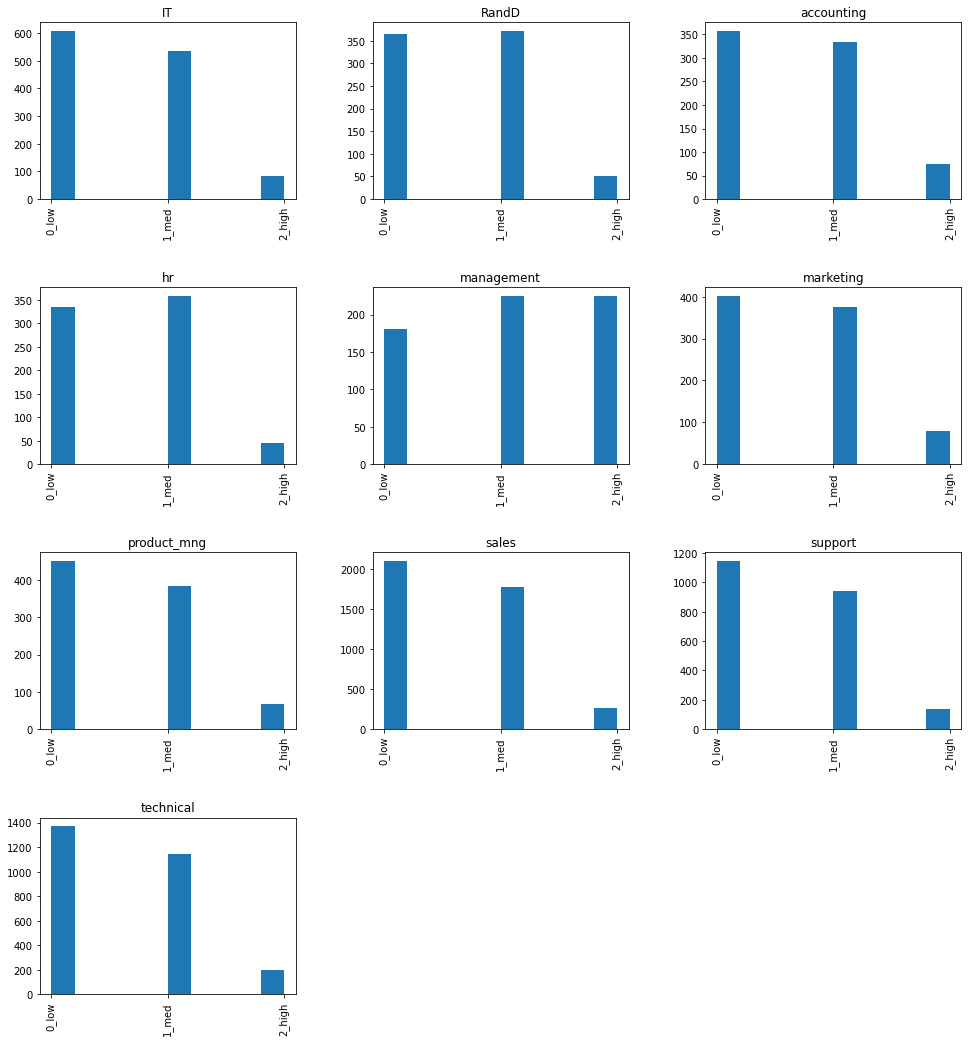

In [11]:
hr_data['salary'].apply(salary_sort).sort_values(ascending=True).hist(by=hr_data['department'], figsize = (16,18)) 
#Распределение зарплат по департаментам

### Проверим гипотезу что сотрудники с высоким окладомпроводят на работе больше времени, чем сотрудники с низким окладом (7)

Н0 - Сотрудники с высоким окладом проводят одинаковое количество времени с сотрудниками с низким окладом

Н1 - Сотрудники с высоким окладом проводят разное количество времени с сотрудниками с низким окладом

In [12]:
from scipy import stats

In [13]:
A=hr_data[hr_data['salary']=='high']['average_montly_hours']
B=hr_data[hr_data['salary']=='low']['average_montly_hours']

Text(0.5, 0, 'average montly hours')

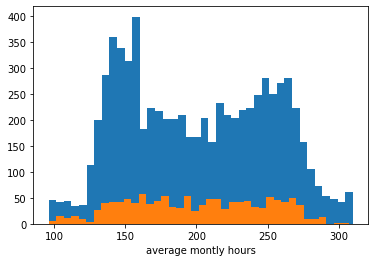

In [14]:
plt.hist(B, bins=40);
plt.hist(A, bins=40);  
plt.xlabel('average montly hours')

In [15]:
import plotly.express as px
fig = px.box(hr_data[hr_data['salary']!='medium'], x='salary', y="average_montly_hours")
fig.show()

In [16]:
alpha = 0.05

results = stats.ttest_ind(A, B, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject null hypothesis')
else:
    print('Can\'t reject null hypothesis')

p-value: 0.4459045542257889
Can't reject null hypothesis


#### Вывод: сотрудники с высоким окладом проводят одинаковое количество времени с сотрудниками с низким окладом

### Считаем метрики по действующим и уволенным сотрудникам (8)

In [17]:
fired_hr_data = hr_data[hr_data['left']==1] #уволеннные сотрудники
nfired_hr_data = hr_data[hr_data['left']==0] #действующие сотрудники

In [18]:
print('Доля сотрудников с повышением в последние 5 лет среди уволенных сотрудников:', round(len(fired_hr_data[fired_hr_data['promotion_last_5years']!=0])/len(fired_hr_data),2)) 
print('Доля сотрудников с повышением в последние 5 лет среди неуволенных сотрудников:', round(len(nfired_hr_data[nfired_hr_data['promotion_last_5years']!=0])/len(nfired_hr_data),2))

Доля сотрудников с повышением в последние 5 лет среди уволенных сотрудников: 0.01
Доля сотрудников с повышением в последние 5 лет среди неуволенных сотрудников: 0.03


In [19]:
print('Средний уровень удовлетворения среди уволенных сотрудников:', round(fired_hr_data['satisfaction_level'].mean(),2))
print('Средний уровень удовлетворения среди неуволенных сотрудников:', round(nfired_hr_data['satisfaction_level'].mean(),2))

Средний уровень удовлетворения среди уволенных сотрудников: 0.44
Средний уровень удовлетворения среди неуволенных сотрудников: 0.67


In [20]:
print('Среднее количество проектов среди уволенных сотрудников:', round(fired_hr_data['number_project'].mean(),2))
print('Среднее количество проектов среди неуволенных сотрудников:', round(nfired_hr_data['number_project'].mean(),2))

Среднее количество проектов среди уволенных сотрудников: 3.86
Среднее количество проектов среди неуволенных сотрудников: 3.79


### Построим LDA модель, предсказывающую уволился ли сотрудник (9)

In [19]:
from sklearn.model_selection import train_test_split
hr_target = hr_data['left']
hr_data_lda = hr_data.drop(['department','salary','time_spend_company'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(hr_data_lda, hr_target, test_size=0.20)

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [21]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [22]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
print('Точность построенной модели -', round(accuracy_score(y_test, lda.predict(X_test)),2))

Точность построенной модели - 0.78
